# Abstract

Una alarma de incendios es un dispositivo capaz de detectar la presencia de fuego y, en consecuencia, emitir una señal que alerte a las personas de un posible incendio. El autor del dataset seleccionado ([ver](https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset)) logró crear un detector de humo con la ayuda de dispositivos [IoT](https://es.wikipedia.org/wiki/Internet_de_las_cosas) y un modelo de IA. Para ello, se realizaron numerosas pruebas en distintas condiciones externas y con diferentes fuentes de fuego, de esa manera se garantiza una muestra heterogénea de datos para el entrenamiento de la IA. 

Las variables del dataset son:
- UTC: Tiempo Universal coordinado (tiempo en el que se llevó a cabo el experimento). 
- Temperature[C]: Temperatura de los alrededores, en Celsius.
- Humidity[%]: Humedad de ambiente.
- TVOC[ppb]: Compuestos organicos volatiles totales, en ppb. 
- eCO2[ppm]: Concentración de CO2, en ppm.
- Raw H2: Hidrógeno crudo en alrededores.
- Raw Ethanol: Etanol crudo en el ambiente.
- Pressure[hPa]: Presión atmosférica, en hPa.
- PM1.0: Paticulate matter of diameter less than 1.0 micrometer.
- PM2.5: Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5: Concentración de particulas de diámetro menor a 0.5 micrómetros.
- NC1.0: Concentración de particulas de diámetro menor a 1.0 micrómetros.
- NC2.5: Concentración de particulas de diámetro menor a 2.5 micrómetros.
- CNT: Contador de prueba.
- Fire Alarm: 1 positivo,  0 no positivo. 


[Fuente](https://www.hackster.io/stefanblattmann/real-time-smoke-detection-with-ai-based-sensor-fusion-1086e6).

## Hipótesis

Con la presente información se plantean las siguientes hipótesis.

1. La mayor densidad de muestras debe estar en un rango de temperatura ambiente 15-30 ºC. Esto es porque se esperaría que el detector de humo esté mejor testeado en temperaturas de funcionamiento normales. 
2. Se espera que la cantidad de veces que la alarma suene supere con creces a la cantidad de veces que no suene, de esa manera nos aseguramos de que la calidad del sensor sea adecuada. 
3. Se espera que en temperaturas extremas sea cuanto mayor probabilidad de fallas tenga el sensor, es decir que el porcentaje de veces que no suene la alarma en rangos extremos sea mayor que el porcentaje de veces que no suene en condiciones normales. 


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_smoke=pd.read_csv('/workspaces/codespaces-blank/Proyecto_DS/datasets/raw/smoke_detection_iot.csv')

df_smoke = df_smoke.drop('Unnamed: 0', axis='columns')
df_smoke.index = df_smoke['CNT']
df_smoke = df_smoke.drop('CNT', axis='columns')
df_smoke.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
CNT,,,,,,,,,,,,,,
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


In [4]:
temperatura_2 = df_smoke['Temperature[C]'].astype(int)
count_temp = pd.Series(temperatura_2).value_counts()

temperatura_2 = df_smoke['Temperature[C]'].astype(int)
temperatura_3 = list(set(df_smoke['Temperature[C]'].astype(int).tolist()))
fire = df_smoke['Fire Alarm']

k = []
on = 0
off_2 = 0
off = 0

def countOccurrence(temperatures):

  for j in temperatures:
    on = df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].sum()
    off_2= df_smoke.loc[pd.Series(temperatura_2) == j, 'Fire Alarm'].count()
    off=off_2-on
    k.append([j, off_2, on, off])

  return k
  
print(countOccurrence(temperatura_3))

df = pd.DataFrame(k, columns=['Temperatura', 'Numero experimentos', 'Alarma sonó', 'Alarma no sonó'])
print(df)

[[0, 721, 586, 135], [1, 343, 279, 64], [2, 332, 270, 62], [3, 328, 267, 61], [4, 323, 263, 60], [5, 321, 260, 61], [6, 317, 259, 58], [7, 320, 260, 60], [8, 319, 259, 60], [9, 321, 212, 109], [10, 359, 186, 173], [11, 653, 263, 390], [12, 2281, 1622, 659], [13, 1478, 840, 638], [14, 1269, 724, 545], [15, 1217, 684, 533], [16, 1244, 682, 562], [17, 1369, 711, 658], [18, 2672, 1898, 774], [19, 2928, 2296, 632], [20, 4814, 3842, 972], [21, 1570, 1250, 320], [22, 1393, 1143, 250], [23, 793, 505, 288], [24, 6329, 5894, 435], [25, 3115, 2083, 1032], [26, 7119, 5326, 1793], [27, 2396, 1488, 908], [28, 1252, 16, 1236], [29, 452, 4, 448], [30, 28, 7, 21], [31, 95, 57, 38], [32, 62, 47, 15], [33, 72, 65, 7], [34, 106, 80, 26], [35, 98, 75, 23], [36, 106, 97, 9], [37, 101, 97, 4], [38, 203, 156, 47], [39, 112, 81, 31], [40, 115, 99, 16], [41, 85, 46, 39], [42, 43, 0, 43], [43, 108, 0, 108], [44, 35, 0, 35], [45, 60, 0, 60], [46, 146, 0, 146], [47, 59, 0, 59], [48, 111, 0, 111], [49, 47, 0, 47], 

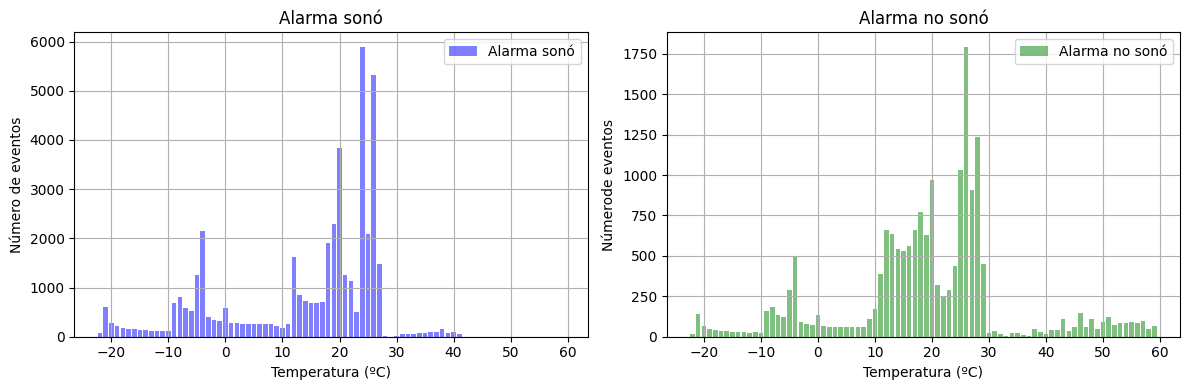

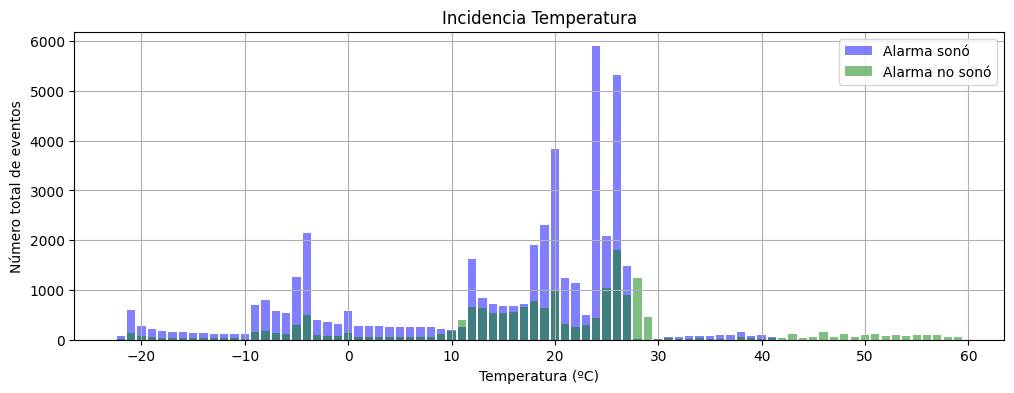

In [5]:
x = df['Temperatura']
y = df['Alarma sonó']
z = df['Alarma no sonó']


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Primera gráfica
ax1.bar(x, y, alpha=0.5, color='blue', label='Alarma sonó')
ax1.set_title('Alarma sonó')
ax1.set_ylabel('Número de eventos')
ax1.set_xlabel('Temperatura (ºC)')
ax1.grid('True')
ax1.legend()

# Segunda gráfica
ax2.bar(x, z, alpha=0.5, color='green', label='Alarma no sonó')
ax2.set_title('Alarma no sonó')
ax2.set_ylabel('Númerode eventos')
ax2.set_xlabel('Temperatura (ºC)')
ax2.grid('True')
ax2.legend()

plt.tight_layout()

fig, ax = plt.subplots(figsize=(12, 4))
ax.bar(x,y, alpha=0.5, color = 'blue',label='Alarma sonó')
ax.bar(x,z, alpha=0.5, color = 'green',label='Alarma no sonó')
ax.set_title('Incidencia Temperatura')
ax.set_ylabel('Número total de eventos')
ax.set_xlabel('Temperatura (ºC)')
ax.grid('True')
ax.legend()

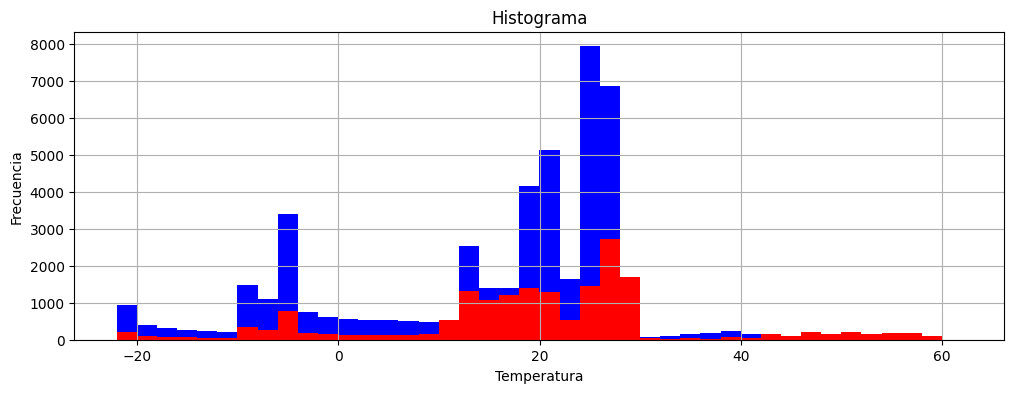

In [6]:
x = df_smoke['Temperature[C]'].dropna()
y = df_smoke['Fire Alarm'].dropna()

#como tengo un millón de valores de x no tiene sentido que considere todos distintos cuando la variación 
# entre temperaturas es tan pequeña (aparte que no me deja matplotlib), por lo tanto agrupo las x 
# definiendo los intervalos de los bins (xmin y xmax), con las y asociadas correspondientes. 
bin_edges = np.arange(x.min(), np.ceil(x.max()) + 2, 2)

# Selecciona los valores de x correspondientes a cada intervalo
x_binned = np.digitize(x, bin_edges) - 1

hist, _ = np.histogram(x, bins=bin_edges)

fig, ax1 = plt.subplots(figsize=(12, 4))
# Crear el histograma
for i in range(len(bin_edges) - 1): 
    ax1.hist(x[(x_binned == i) & (y == 1)], bins=bin_edges, color='blue', label='Alarma sonó')
    ax1.hist(x[(x_binned == i) & (y == 0)], bins=bin_edges, color='red', label='Alarma no sonó')

ax1.set_title('Histograma')
ax1.set_ylabel('Frecuencia')
ax1.set_xlabel('Temperatura')
ax1.grid('True')

plt.show()

## Nota
No logro colocar bien la leyenda, ya que me la coloca multiples veces igual. Corregir para próxima entrega

Con el histograma anterior ya somos capaces de comprobar las hipótesis 1 y 2.
1. La mayor densidad de muestras está en un rango de temperatura ambiente 10-30 ºC.
2. La cantidad de veces que la alarma suena la alarma (azul) supera con creces a la cantidad de veces que no suena la alarma (rojo).

/tmp/ipykernel_6173/3102740898.py:20: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  ax = df_filtered.pivot('Temperature[C]', 'Fire Alarm', 'percentage').plot(kind='bar', stacked=True, width=1.0, edgecolor='k')


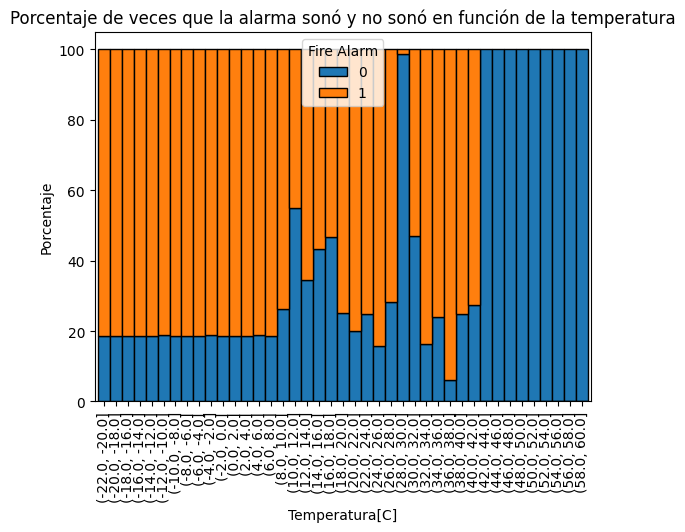

In [12]:
df_smoke.dropna(inplace=True)


bin_edges = np.arange(np.ceil(df_smoke['Temperature[C]'].min()), np.ceil(df_smoke['Temperature[C]'].max()) + 2, 2)

df_grouped = df_smoke.groupby(pd.cut(df_smoke['Temperature[C]'], bin_edges))

df_percentages = df_grouped['Fire Alarm'].value_counts(normalize=True).mul(100).rename('percentage').reset_index()

df_filtered = df_percentages[df_percentages['Fire Alarm'].isin([0, 1])]


ax = df_filtered.pivot('Temperature[C]', 'Fire Alarm', 'percentage').plot(kind='bar', stacked=True, width=1.0, edgecolor='k')

ax.set_xlabel('Temperatura[C]')
ax.set_ylabel('Porcentaje')
ax.set_title('Porcentaje de veces que la alarma sonó y no sonó en función de la temperatura')

plt.show()

Para responder la hipótesis 3:

3. Se espera que en temperaturas extremas sea cuanto mayor probabilidad de fallas tenga el sensor, es decir que el porcentaje de veces que no suene la alarma en rangos extremos sea mayor que el porcentaje de veces que no suene en condiciones normales. 
Queda respondida con este gráfico.